In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
df=pd.read_csv(r"C:\Users\Avinash\Desktop\Internship\Project\Micro-Credit-Project--3-\Micro Credit Project\Data file.csv")
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
df.shape

(209593, 37)

In [4]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There are no null values

In [5]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

We are removing Unnamed: 0 as it is not useful

In [6]:
df.drop(columns={"Unnamed: 0"},inplace=True)

We are also dropping pcircle because it has only one value which is not benifitial for model building

In [7]:
df.drop(columns={"pcircle"},inplace=True)

We will also drop daily_decr30,rental30,cnt_da_rech30,fr_da_rech30,maxamnt_loans30,medianamnt_loans30,payback30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,amnt_loans30 as we have the 90 days data for the same columns.

In [8]:
df.drop(columns={"daily_decr30","rental30","cnt_da_rech30",'amnt_loans30',"fr_da_rech30","maxamnt_loans30","medianamnt_loans30","payback30",'fr_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30','cnt_ma_rech30','cnt_loans30'},inplace=True)

In [9]:
df.head()

,label,msisdn,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,pdate
0,0,21408I70789,272.0,3065.150000,260.13,2.0,0.0,1539,2,21,3078,1539.0,7.50,0,0,2.0,12,6,0.0,29.000000,2016-07-20
1,1,76462I70374,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0,5787,5787.0,61.04,0,0,1.0,12,12,0.0,0.000000,2016-08-10
2,1,17943I70372,535.0,1398.000000,900.13,3.0,0.0,1539,1,0,1539,1539.0,66.32,0,0,1.0,6,6,0.0,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,159.42,41.0,0.0,947,1,0,947,947.0,2.50,0,0,2.0,12,6,0.0,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,1098.90,4.0,0.0,2309,8,2,23496,2888.0,35.00,0,0,7.0,42,6,0.0,2.333333,2016-06-22


# Finding Any Highly Correlated values

In [10]:
corr_matrix = df.corr().abs()

In [11]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))# Select upper triangle of correlation matrix

In [12]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]# Find features with correlation greater than 0.90

In [13]:
to_drop

[]

In [14]:
df.drop(df[to_drop],axis=1,inplace=True)

# Lets see the catagorical columns

In [15]:
catagory=[]
catagory=df.select_dtypes(include="object").columns
for i in catagory:
    print(i,df[i].unique())
    print("**********************************************************************")

msisdn ['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
**********************************************************************
pdate ['2016-07-20' '2016-08-10' '2016-08-19' '2016-06-06' '2016-06-22'
 '2016-07-02' '2016-07-05' '2016-08-05' '2016-06-15' '2016-06-08'
 '2016-06-12' '2016-06-20' '2016-06-29' '2016-06-16' '2016-08-03'
 '2016-06-24' '2016-07-04' '2016-07-03' '2016-07-01' '2016-08-08'
 '2016-06-26' '2016-06-23' '2016-07-06' '2016-07-09' '2016-06-10'
 '2016-06-07' '2016-06-27' '2016-08-11' '2016-06-30' '2016-06-19'
 '2016-07-26' '2016-08-14' '2016-06-14' '2016-06-21' '2016-06-25'
 '2016-06-28' '2016-06-11' '2016-07-27' '2016-07-23' '2016-08-16'
 '2016-08-15' '2016-06-02' '2016-06-05' '2016-08-02' '2016-07-28'
 '2016-07-18' '2016-08-18' '2016-07-16' '2016-07-29' '2016-07-21'
 '2016-06-03' '2016-06-13' '2016-08-01' '2016-07-13' '2016-07-10'
 '2016-06-09' '2016-07-15' '2016-07-11' '2016-08-09' '2016-08-12'
 '2016-07-22' '2016-06-04' '2016-

We are Dropping msisdn because it is mobile number of users which is irrelavent in predicting our target variable

In [16]:
df.drop(columns={"msisdn"},inplace=True)

We only need the day and the month so we are going to seperate them.

In [17]:
day=[]
month=[]
for i in df.pdate:
         day.append((i.split("-")[2]).lstrip('0'))
         month.append(i.split("-")[1].lstrip('0'))

In [18]:
df["pDay"]=day
df["pDay"]=pd.to_numeric(df["pDay"], errors='ignore')
df["pMonth"]=month
df["pMonth"]=pd.to_numeric(df["pMonth"], errors='ignore')
df.drop(columns={"pdate"},inplace=True)

In [19]:
df.head()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,pDay,pMonth
0,0,272.0,3065.150000,260.13,2.0,0.0,1539,2,21,3078,1539.0,7.50,0,0,2.0,12,6,0.0,29.000000,20,7
1,1,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0,5787,5787.0,61.04,0,0,1.0,12,12,0.0,0.000000,10,8
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0,1539,1539.0,66.32,0,0,1.0,6,6,0.0,0.000000,19,8
3,1,241.0,21.228000,159.42,41.0,0.0,947,1,0,947,947.0,2.50,0,0,2.0,12,6,0.0,0.000000,6,6
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,8,2,23496,2888.0,35.00,0,0,7.0,42,6,0.0,2.333333,22,6


At this point we have dealt with all the Catagorical Column

## Now we will try to find outlier in our dataset

### Lets us now see all the Maximums and Minimums of our Dataset

In [20]:
df.describe()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,pDay,pMonth
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000
mean,0.875177,8112.343445,6082.515068,3483.406534,3755.847800,3712.202921,2064.452797,6.31543,7.716780,12396.218352,1864.595821,92.025541,0.041495,0.045712,18.520919,23.645398,6.703134,0.046077,4.321485,14.39894,6.797321
std,0.330519,75696.082531,10918.812767,5770.461279,53905.892230,53374.833430,2370.786034,7.19347,12.590251,16857.793882,2081.680664,369.215658,0.397556,0.951386,224.797423,26.469861,2.103864,0.200692,10.308108,8.43890,0.741435
min,0.000000,-48.000000,-93.012667,-24720.580000,-29.000000,-29.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000
25%,1.000000,246.000000,42.692000,300.260000,1.000000,0.000000,770.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,7.00000,6.000000
50%,1.000000,527.000000,1500.000000,1334.000000,3.000000,0.000000,1539.000000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,1.666667,14.00000,7.000000
75%,1.000000,982.000000,7802.790000,4201.790000,7.000000,0.000000,2309.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,5.000000,30.000000,6.000000,0.000000,4.500000,21.00000,7.000000
max,1.000000,999860.755168,320630.000000,200148.110000,998650.377733,999171.809410,55000.000000,336.00000,88.000000,953036.000000,55000.000000,41456.500000,38.000000,64.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,31.00000,8.000000


### Lets Us see the boxplots of all these columns

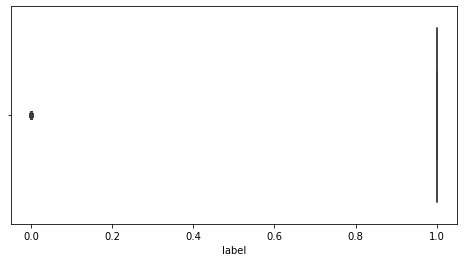

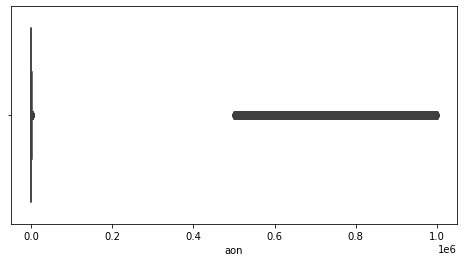

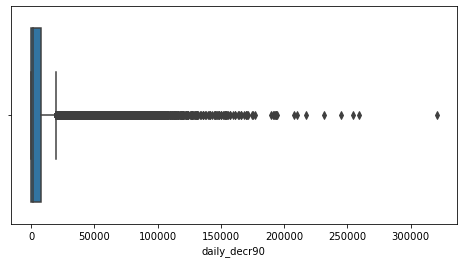

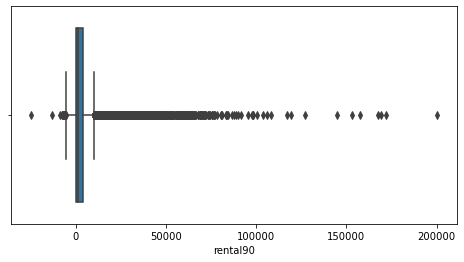

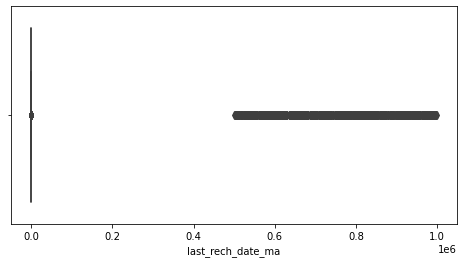

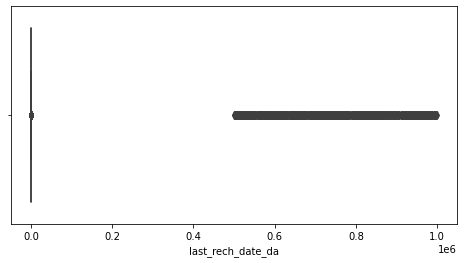

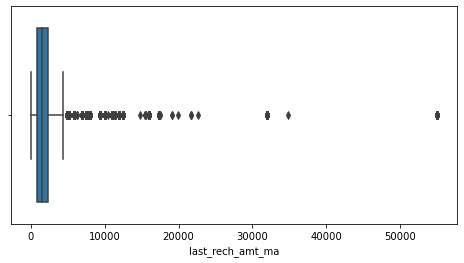

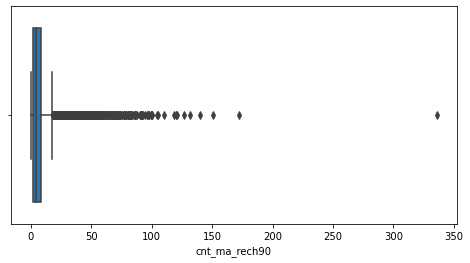

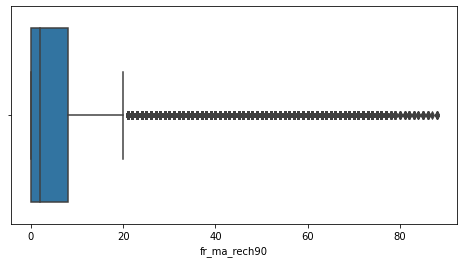

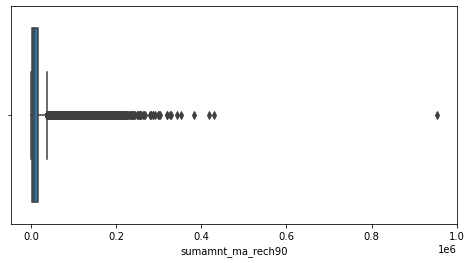

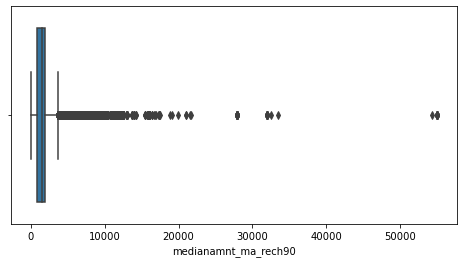

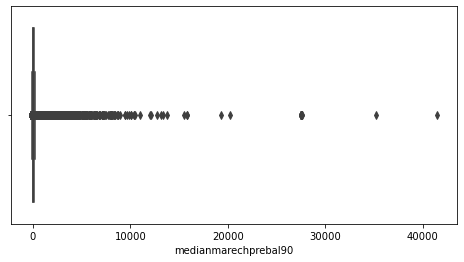

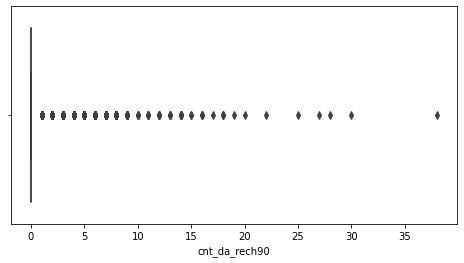

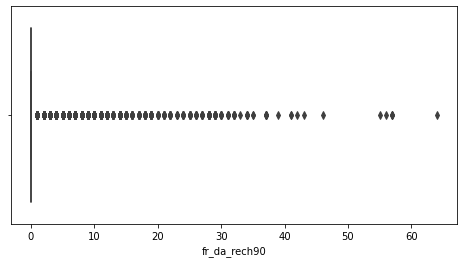

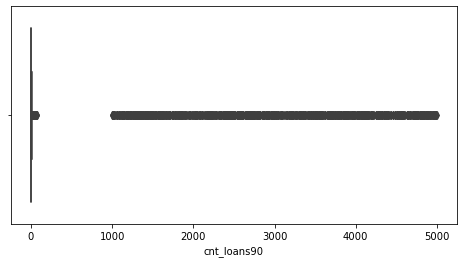

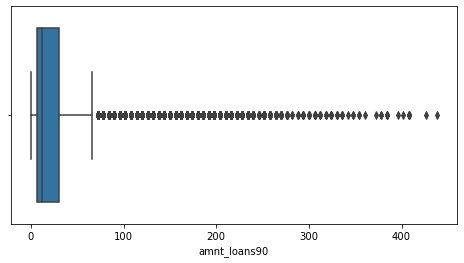

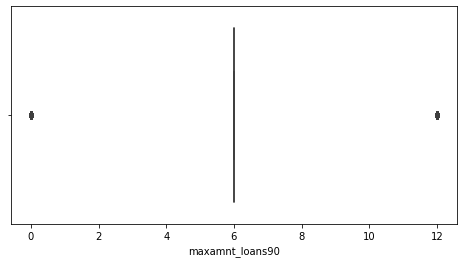

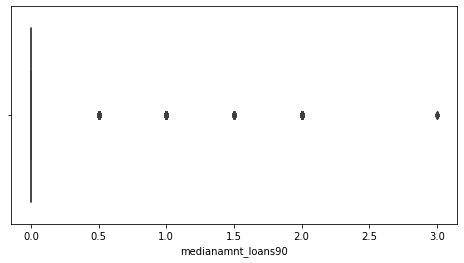

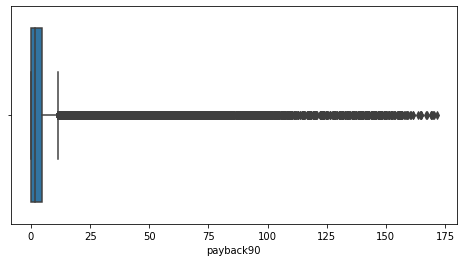

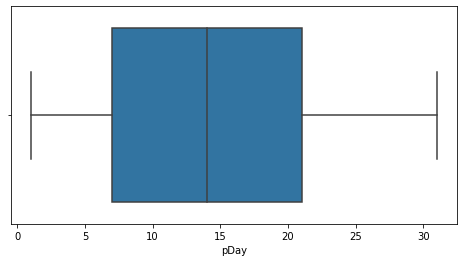

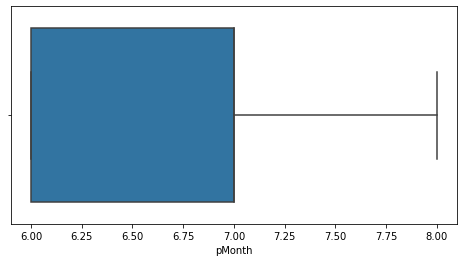

In [21]:
for column in df:
        plt.figure(figsize=(8,4))
        sn.boxplot(x=column,data=df)

### Treating aon column

"aon" is defined as "age on cellular network in days" that means if we consider the average life expectency for Indonesia is "71.72" years so we will multiply 365 days to it to get the maximum days a person could have a number.This assumption is based upon the data provided on the internet and I am not considering the age limit to get a number to be on the safe side.

So, 72*365=26,280 days . Any number more than this is an outlier and we will work on that row accordingly.

In [22]:
outliers=[]
index=[]
for i in range(len(df.aon)):
    if (df.iloc[i,1])>26280:
        outliers.append(df.iloc[i,1])
        index.append(i)

In [23]:
len(outliers)

2089

Now we will drop these rows because it could also contains values which is unreasonable for other ccolumns also.

Also only .99% data we be lost which is in acceptable range

In [24]:
df.drop(df.index[index],inplace=True)

In [25]:
df.head()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,pDay,pMonth
0,0,272.0,3065.150000,260.13,2.0,0.0,1539,2,21,3078,1539.0,7.50,0,0,2.0,12,6,0.0,29.000000,20,7
1,1,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0,5787,5787.0,61.04,0,0,1.0,12,12,0.0,0.000000,10,8
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0,1539,1539.0,66.32,0,0,1.0,6,6,0.0,0.000000,19,8
3,1,241.0,21.228000,159.42,41.0,0.0,947,1,0,947,947.0,2.50,0,0,2.0,12,6,0.0,0.000000,6,6
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,8,2,23496,2888.0,35.00,0,0,7.0,42,6,0.0,2.333333,22,6


### Treating last_rech_date_ma column

All the values in this columns are less then 100 and all the above values are too high to be the number of days. Also some of the values are in negative and days could not be in negative.

In [26]:
outliers=[]
index=[]
for i in range(len(df.aon)):
    if ((df.iloc[i,4]>100) or (df.iloc[i,4]<0)):
        outliers.append(df.iloc[i,4])
        index.append(i)

In [27]:
len(outliers)

2357

We will drop these columns.

In [28]:
df.drop(df.index[index],inplace=True)

In [29]:
df.head()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,pDay,pMonth
0,0,272.0,3065.150000,260.13,2.0,0.0,1539,2,21,3078,1539.0,7.50,0,0,2.0,12,6,0.0,29.000000,20,7
1,1,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0,5787,5787.0,61.04,0,0,1.0,12,12,0.0,0.000000,10,8
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0,1539,1539.0,66.32,0,0,1.0,6,6,0.0,0.000000,19,8
3,1,241.0,21.228000,159.42,41.0,0.0,947,1,0,947,947.0,2.50,0,0,2.0,12,6,0.0,0.000000,6,6
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,8,2,23496,2888.0,35.00,0,0,7.0,42,6,0.0,2.333333,22,6


### Treating last_rech_date_da column

By looking at the xml file this column has mostly 0 as valuse.                                                         
Hence I am checking how many 0 threr are.

In [30]:
noz=0
index=[]
for i in range(len(df.last_rech_date_ma)):
    if ((df.iloc[i,5])==0):
        noz+=1

In [31]:
noz

198538

Deleting this column as 96.77% data is 0

In [32]:
df.drop(columns={"last_rech_date_da"},inplace=True)

In [33]:
df.head()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,pDay,pMonth
0,0,272.0,3065.150000,260.13,2.0,1539,2,21,3078,1539.0,7.50,0,0,2.0,12,6,0.0,29.000000,20,7
1,1,712.0,12124.750000,3691.26,20.0,5787,1,0,5787,5787.0,61.04,0,0,1.0,12,12,0.0,0.000000,10,8
2,1,535.0,1398.000000,900.13,3.0,1539,1,0,1539,1539.0,66.32,0,0,1.0,6,6,0.0,0.000000,19,8
3,1,241.0,21.228000,159.42,41.0,947,1,0,947,947.0,2.50,0,0,2.0,12,6,0.0,0.000000,6,6
4,1,947.0,150.619333,1098.90,4.0,2309,8,2,23496,2888.0,35.00,0,0,7.0,42,6,0.0,2.333333,22,6


### Treating cnt_da_rech90 and fr_da_rech90 columns

According to the df.describe() method we can safly say that more than 75% data is 0 which is of no use.So we are going to drop these columns as well.

In [34]:
df.drop(columns={'cnt_da_rech90','fr_da_rech90'},inplace=True)

### Treating cnt_ma_rech90 and fr_ma_rech90 column

As both of these columns have the same definition according to the Data_Descriprion xml file so we are going to drop one of the column.

In [35]:
corr1=df.label.corr(df.cnt_ma_rech90)
corr2=df.label.corr(df.fr_ma_rech90)
print(corr1,'\n',corr2)

0.2380271292897266 
 0.08312770328064291


As the correlation with our target variable is better in the case of cnt_ma_rech90 so we are going to keep this column and delete the other one.

In [36]:
df.drop(columns={'fr_ma_rech90'},inplace=True)

### Treating cnt_loans90 column

We can see there is a abnormal maximum value 4997.517944 in this column and 30 is the 75% of the values so we are going to delete any value higher than 100 just to be on the safe side.

In [37]:
df.describe()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,pDay,pMonth
count,205147.000000,205147.000000,205147.000000,205147.000000,205147.000000,205147.000000,205147.000000,205147.000000,205147.000000,205147.000000,205147.000000,205147.000000,205147.000000,205147.000000,205147.000000,205147.000000,205147.000000
mean,0.874490,654.999166,6119.884559,3503.501146,6.143268,2060.736989,6.339937,12437.602222,1861.056369,91.598069,18.572360,23.751895,6.708253,0.045874,4.345264,14.425909,6.802376
std,0.331297,499.389843,10930.008032,5783.970370,9.341881,2366.005813,7.203513,16883.980108,2076.990192,370.166308,225.292888,26.522203,2.109468,0.200225,10.326386,8.439841,0.740987
min,0.000000,-48.000000,-93.012667,-24720.580000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,1.000000,243.000000,43.899667,308.085000,1.000000,770.000000,2.000000,2317.000000,773.000000,14.525000,1.000000,6.000000,6.000000,0.000000,0.000000,7.000000,6.000000
50%,1.000000,519.000000,1531.780000,1352.060000,3.000000,1539.000000,4.000000,7307.000000,1539.000000,36.000000,2.000000,12.000000,6.000000,0.000000,1.666667,14.000000,7.000000
75%,1.000000,963.000000,7873.680000,4231.965000,7.000000,2309.000000,9.000000,16091.000000,1924.000000,79.000000,5.000000,30.000000,6.000000,0.000000,4.500000,21.000000,7.000000
max,1.000000,2440.000000,320630.000000,200148.110000,100.000000,55000.000000,336.000000,953036.000000,55000.000000,41456.500000,4997.517944,438.000000,12.000000,3.000000,171.500000,31.000000,8.000000


In [38]:
abnormal=0
index=[]
for i in range(len(df.last_rech_date_ma)):
    if ((df.iloc[i,10])>100):
        abnormal+=1
        index.append(i)

In [39]:
abnormal

1024

now we are going to delete these columns.

In [40]:
df.drop(df.index[index],inplace=True)

In [41]:
df.head()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,pDay,pMonth
0,0,272.0,3065.150000,260.13,2.0,1539,2,3078,1539.0,7.50,2.0,12,6,0.0,29.000000,20,7
1,1,712.0,12124.750000,3691.26,20.0,5787,1,5787,5787.0,61.04,1.0,12,12,0.0,0.000000,10,8
2,1,535.0,1398.000000,900.13,3.0,1539,1,1539,1539.0,66.32,1.0,6,6,0.0,0.000000,19,8
3,1,241.0,21.228000,159.42,41.0,947,1,947,947.0,2.50,2.0,12,6,0.0,0.000000,6,6
4,1,947.0,150.619333,1098.90,4.0,2309,8,23496,2888.0,35.00,7.0,42,6,0.0,2.333333,22,6


In [42]:
df.describe()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,pDay,pMonth
count,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000
mean,0.874438,654.859296,6118.978055,3502.953621,6.143561,2060.679179,6.337620,12433.950334,1860.850965,91.616338,3.709028,23.747241,6.708396,0.045884,4.346113,14.425797,6.802399
std,0.331355,499.329661,10933.495078,5783.442044,9.340763,2366.658645,7.202459,16886.825665,2077.087610,370.613596,4.035143,26.516075,2.109873,0.200262,10.331626,8.438902,0.740978
min,0.000000,-48.000000,-93.012667,-24720.580000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,1.000000,243.000000,43.899167,308.000000,1.000000,770.000000,2.000000,2317.000000,773.000000,14.500000,1.000000,6.000000,6.000000,0.000000,0.000000,7.000000,6.000000
50%,1.000000,519.000000,1532.000000,1351.890000,3.000000,1539.000000,4.000000,7304.000000,1539.000000,35.950000,2.000000,12.000000,6.000000,0.000000,1.666667,14.000000,7.000000
75%,1.000000,963.000000,7871.100000,4231.965000,7.000000,2309.000000,9.000000,16067.000000,1924.000000,79.000000,5.000000,30.000000,6.000000,0.000000,4.500000,21.000000,7.000000
max,1.000000,2440.000000,320630.000000,200148.110000,100.000000,55000.000000,336.000000,953036.000000,55000.000000,41456.500000,71.000000,438.000000,12.000000,3.000000,171.500000,31.000000,8.000000


### Treating amnt_loans90 and maxamnt_loans90 column

As these values could be only multiples of 6 se we are going to check exactly that and if we find some abnormalities then we are going to delete them.

In [43]:
abnormal=0
index=[]
for i in range(len(df.last_rech_date_ma)):
    if ((df.iloc[i,11]%6)!=0):
        abnormal+=1
        index.append(i)

In [44]:
abnormal

0

In [45]:
abnormal=0
index=[]
for i in range(len(df.last_rech_date_ma)):
    if ((df.iloc[i,12]%6)!=0):
        abnormal+=1
        index.append(i)

In [46]:
abnormal

0

So The are are no abnormal data.

### Treating medianamnt_loans90 column

In [47]:
df.describe()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback90,pDay,pMonth
count,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000,204123.000000
mean,0.874438,654.859296,6118.978055,3502.953621,6.143561,2060.679179,6.337620,12433.950334,1860.850965,91.616338,3.709028,23.747241,6.708396,0.045884,4.346113,14.425797,6.802399
std,0.331355,499.329661,10933.495078,5783.442044,9.340763,2366.658645,7.202459,16886.825665,2077.087610,370.613596,4.035143,26.516075,2.109873,0.200262,10.331626,8.438902,0.740978
min,0.000000,-48.000000,-93.012667,-24720.580000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,1.000000,243.000000,43.899167,308.000000,1.000000,770.000000,2.000000,2317.000000,773.000000,14.500000,1.000000,6.000000,6.000000,0.000000,0.000000,7.000000,6.000000
50%,1.000000,519.000000,1532.000000,1351.890000,3.000000,1539.000000,4.000000,7304.000000,1539.000000,35.950000,2.000000,12.000000,6.000000,0.000000,1.666667,14.000000,7.000000
75%,1.000000,963.000000,7871.100000,4231.965000,7.000000,2309.000000,9.000000,16067.000000,1924.000000,79.000000,5.000000,30.000000,6.000000,0.000000,4.500000,21.000000,7.000000
max,1.000000,2440.000000,320630.000000,200148.110000,100.000000,55000.000000,336.000000,953036.000000,55000.000000,41456.500000,71.000000,438.000000,12.000000,3.000000,171.500000,31.000000,8.000000


As we can see from ths table that more than 75% of this column's data is 0 so we are going to delete this column.

In [48]:
df.drop(columns={"medianamnt_loans90"},inplace=True)

Uptill now we have cleaned our data now we are going to try to find some insite out of our data.

# Visualising Our target variable with other Columns

## Distplot

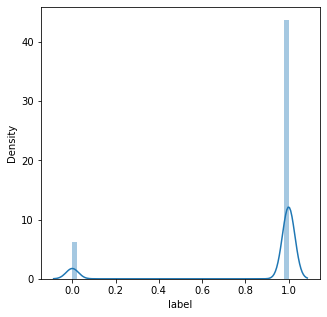

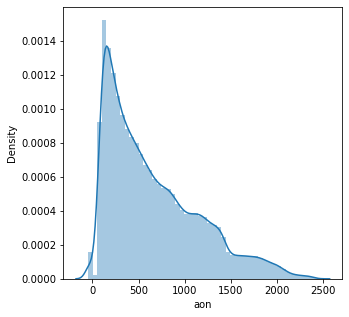

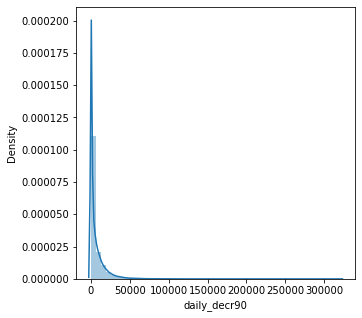

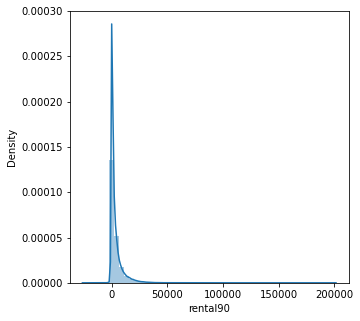

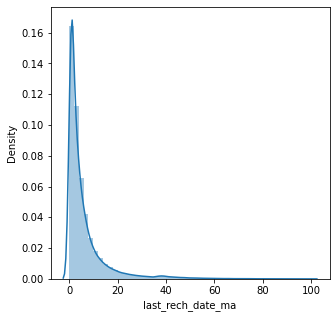

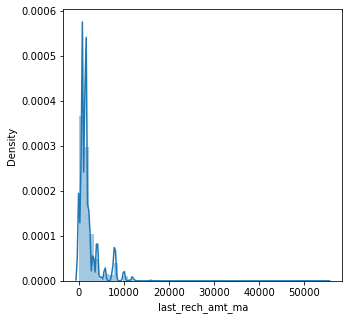

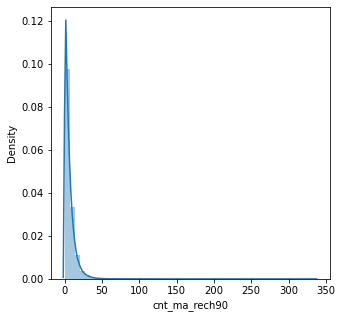

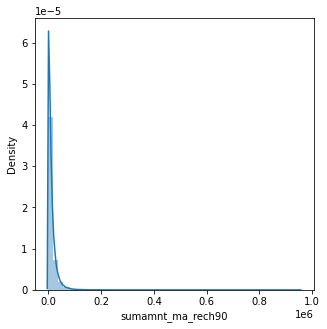

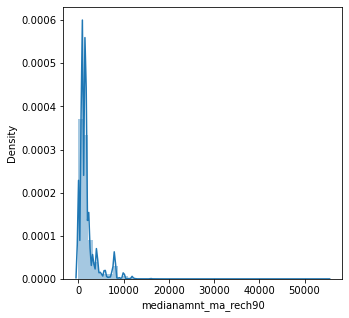

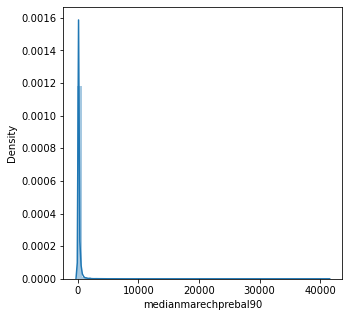

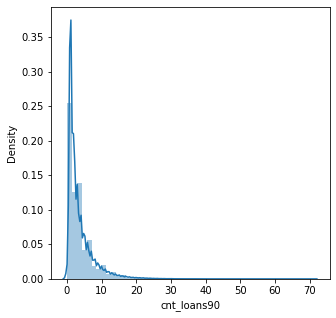

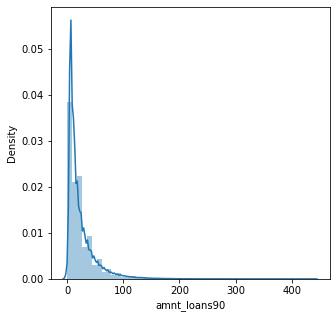

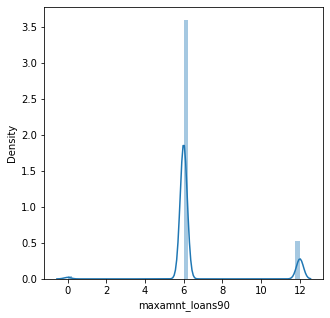

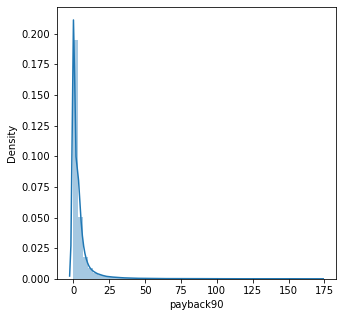

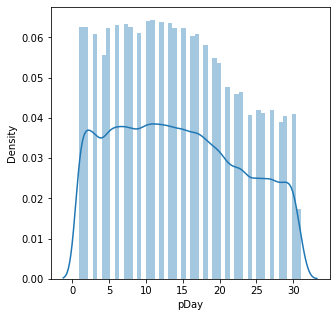

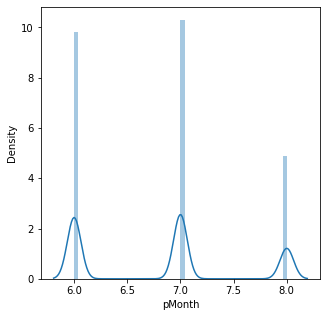

In [49]:
for column in df:
        plt.figure(figsize=(5,5))
        sn.distplot(df[column])

Most of the columns are right skewed

## Boxplot

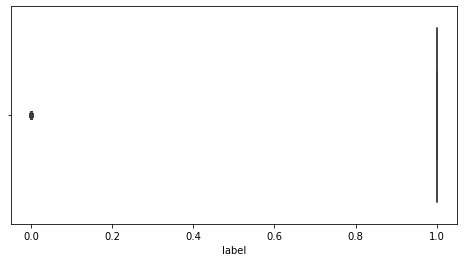

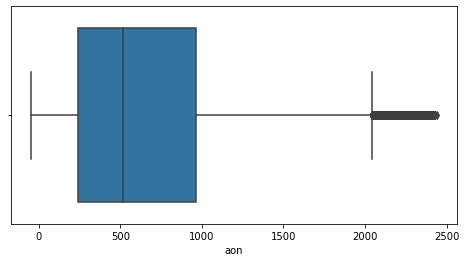

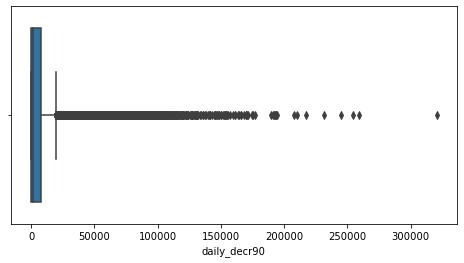

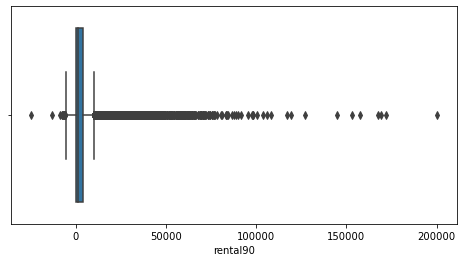

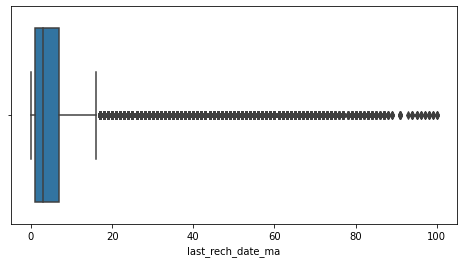

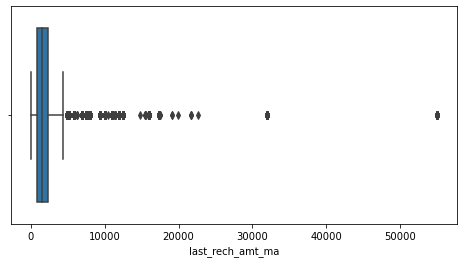

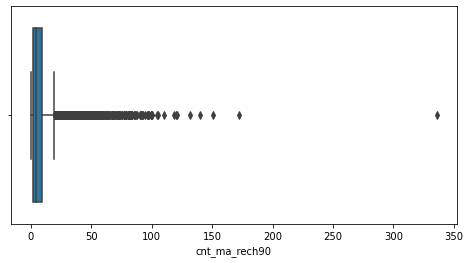

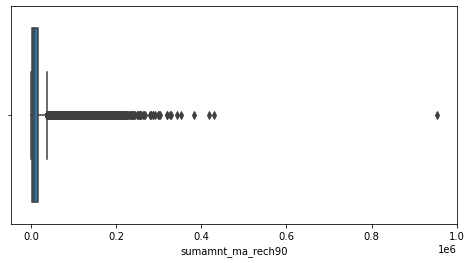

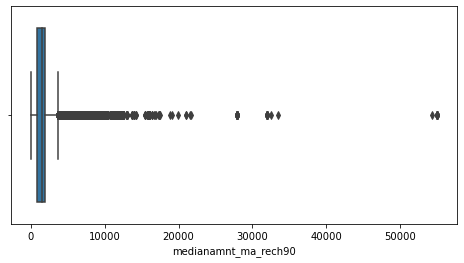

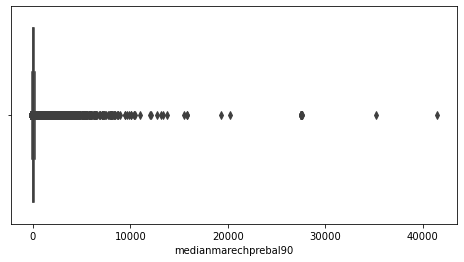

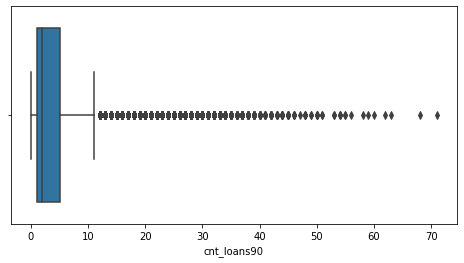

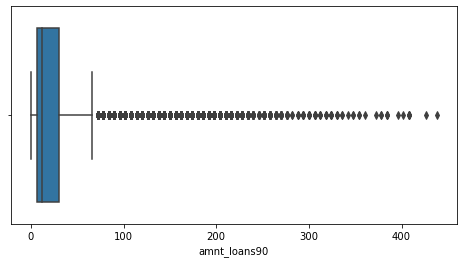

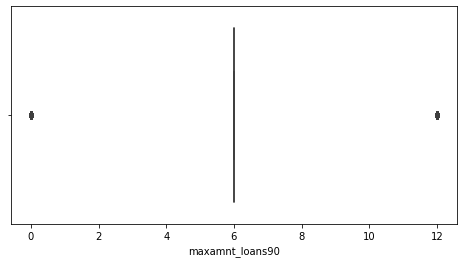

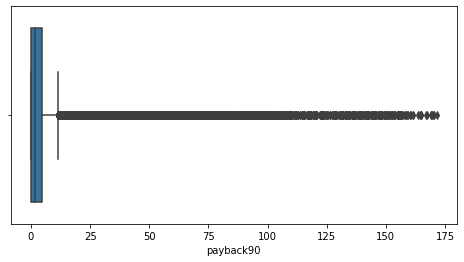

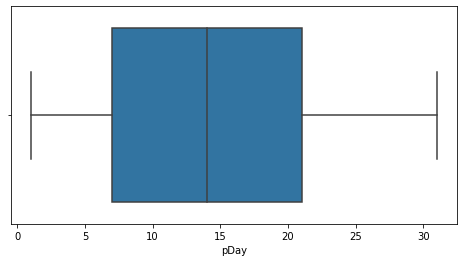

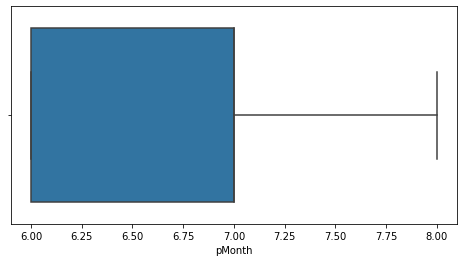

In [50]:
for column in df:
        plt.figure(figsize=(8,4))
        sn.boxplot(x=column,data=df)

High amounts of outliers are still present

<AxesSubplot:>

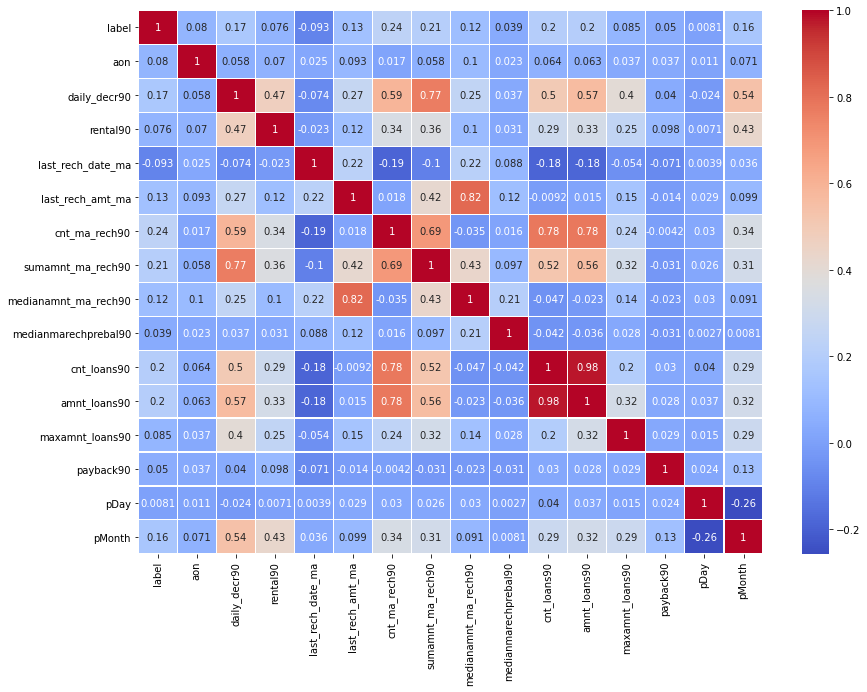

In [51]:
plt.figure(figsize=(14,10))
sn.heatmap(df.corr(),linewidths=.1,cmap="coolwarm", annot=True)

the maximum correlation with our target variable is 0.24

## Countplot

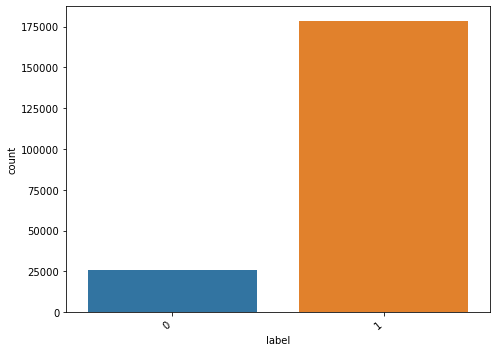

In [52]:
plt.figure(figsize=(7,5))
ax=sn.countplot(df["label"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

1 is in very high amount and 0 is not so much so we have to balance the column.

# Removing outliers

In [53]:
from scipy.stats import zscore

In [54]:
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

# Skewness Removal

In [55]:
df.skew()

label                  -2.188443
aon                     0.906317
daily_decr90            2.096030
rental90                2.251464
last_rech_date_ma       2.138909
last_rech_amt_ma        2.122456
cnt_ma_rech90           1.333383
sumamnt_ma_rech90       1.727155
medianamnt_ma_rech90    2.365904
medianmarechprebal90    3.654364
cnt_loans90             1.614208
amnt_loans90            1.632689
maxamnt_loans90         2.529180
payback90               2.642263
pDay                    0.153358
pMonth                  0.442070
dtype: float64

In [56]:
from scipy.stats import boxcox

### daily_decr90

In [57]:
d=boxcox(df["daily_decr90"]+100)[0]
pd.Series(d).skew()

0.06307763203178247

In [58]:
df["daily_decr90"]=d

### last_rech_date_ma

In [59]:
l=boxcox(df["last_rech_date_ma"]+1)[0]
pd.Series(l).skew()

0.025545324217617547

In [60]:
df["last_rech_date_ma"]=l

### last_rech_amt_ma

In [61]:
l=boxcox(df["last_rech_amt_ma"]+1)[0]
pd.Series(l).skew()

-0.18348905741002178

In [62]:
df["last_rech_amt_ma"]=l

### cnt_ma_rech90

In [63]:
c=np.sqrt(df["cnt_ma_rech90"])
c.skew()

0.06543929760164167

In [64]:
df["cnt_ma_rech90"]=c

### sumamnt_ma_rech90

In [65]:
r=np.sqrt(df["sumamnt_ma_rech90"])
r.skew()

0.3244368843045752

In [66]:
df["sumamnt_ma_rech90"]=r

### medianamnt_ma_rech90

In [67]:
m=boxcox(df["medianamnt_ma_rech90"]+1)[0]
pd.Series(m).skew()

-0.17326084490467455

In [68]:
df["medianamnt_ma_rech90"]=m

### cnt_loans90

In [69]:
c=boxcox(df["cnt_loans90"]+1)[0]
pd.Series(c).skew()

0.17790841156880466

In [70]:
df["cnt_loans90"]=c

### amnt_loans90

In [71]:
a=boxcox(df["amnt_loans90"]+1)[0]
pd.Series(a).skew()

0.11160016582596312

In [72]:
df["amnt_loans90"]=a

### payback90

In [73]:
p=boxcox(df["payback90"]+1)[0]
pd.Series(p).skew()

0.192469758685089

In [74]:
df["payback90"]=p

# Input Splitting

In [75]:
x=df.drop(["label"],axis=1)

In [76]:
y=df["label"]

# Oversampling

In [77]:
from imblearn.over_sampling import RandomOverSampler

In [78]:
ros=RandomOverSampler(random_state=7)

In [79]:
x,y=ros.fit_resample(x,y)

# Finding The Best Model

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [81]:
df.dropna(inplace=True)

In [82]:
from sklearn.model_selection import cross_val_score,train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.10,random_state=7)

In [83]:
#classify function
def classify(model,x,y):
    #train the model
    model.fit(X_train,Y_train)
    ac=model.score(X_test,Y_test)*100
    print("Accuracy:",ac)
    
    #cross validation
    score=cross_val_score(model,x,y,cv=5)
    cv=np.mean(score)*100
    print("CV Score:",cv)
    
    #diffrence between them
    print("Diffrence:",abs(ac-cv))

In [84]:
DTC = DecisionTreeClassifier()
classify(DTC,x,y)

Accuracy: 84.39080501743688
CV Score: 96.09132649374054
Diffrence: 11.700521476303663


In [85]:
RC = RidgeClassifier()
classify(RC,x,y)

Accuracy: 76.75838521791525
CV Score: 76.83520099210044
Diffrence: 0.07681577418519225


In [86]:
RFC = RandomForestClassifier()
classify(RFC,x,y)

Accuracy: 88.58222717230551
CV Score: 97.77403134484244
Diffrence: 9.191804172536933


In [87]:
KNN = KNeighborsClassifier()
classify(KNN,x,y)

Accuracy: 71.32319377750187
CV Score: 85.99082490381737
Diffrence: 14.667631126315499


In [88]:
ETC = ExtraTreesClassifier()
classify(ETC,x,y)

Accuracy: 88.02753382387847
CV Score: 98.46880427846291
Diffrence: 10.44127045458444


Ridge Classifier is our best model as the difference between cv and acc is the lowest

# ROC-AUC Curve

In [91]:
DTC.fit(X_train, Y_train)
y_pred_DTC = DTC.predict(X_test)

In [103]:
RC.fit(X_train, Y_train)
y_pred_RC = RC.predict(X_test)

In [94]:
RFC.fit(X_train, Y_train)
y_pred_RFC = RFC.predict(X_test)

In [96]:
KNN.fit(X_train, Y_train)
y_pred_KNN = KNN.predict(X_test)

In [98]:
ETC.fit(X_train, Y_train)
y_pred_ETC = ETC.predict(X_test)

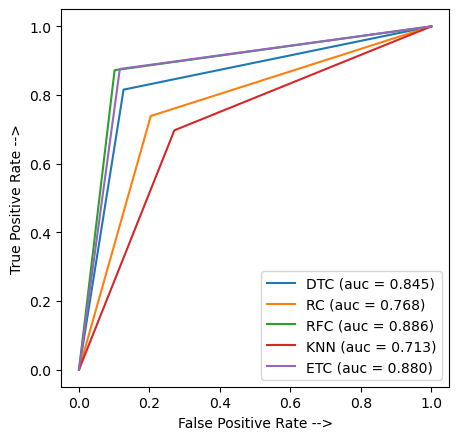

In [104]:
from sklearn.metrics import roc_curve, auc

DTC_fpr, DTC_tpr, threshold = roc_curve(Y_test, y_pred_DTC)
auc_DTC = auc(DTC_fpr, DTC_tpr)
RC_fpr, RC_tpr, threshold = roc_curve(Y_test, y_pred_RC)
auc_RC = auc(RC_fpr, RC_tpr)
RFC_fpr, RFC_tpr, threshold = roc_curve(Y_test, y_pred_RFC)
auc_RFC = auc(RFC_fpr, RFC_tpr)
KNN_fpr, KNN_tpr, threshold = roc_curve(Y_test, y_pred_KNN)
auc_KNN = auc(KNN_fpr, KNN_tpr)
ETC_fpr, ETC_tpr, threshold = roc_curve(Y_test, y_pred_ETC)
auc_ETC = auc(ETC_fpr, ETC_tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(DTC_fpr, DTC_tpr, linestyle='-', label='DTC (auc = %0.3f)' % auc_DTC)
plt.plot(RC_fpr, RC_tpr, linestyle='-', label='RC (auc = %0.3f)' % auc_RC)
plt.plot(RFC_fpr, RFC_tpr, linestyle='-', label='RFC (auc = %0.3f)' % auc_RFC)
plt.plot(KNN_fpr, KNN_tpr, linestyle='-', label='KNN (auc = %0.3f)' % auc_KNN)
plt.plot(ETC_fpr, ETC_tpr, linestyle='-', label='ETC (auc = %0.3f)' % auc_ETC)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

# Hyper parameter tuning

In [ ]:
RC.get_params()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'alpha': [1,2,3,4,5],
    'class_weight': ['dict', 'balanced'],
    'max_iter': [2,4,8,16,32,50],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],    
    'normalize': [True, False]}

In [ ]:
gs = GridSearchCV(RC, params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
gs.fit(X_train, Y_train)

In [ ]:
gs.best_params_

# Checking Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
RC=RidgeClassifier(alpha= 3,
 class_weight= 'balanced',
 max_iter= 2,
 normalize= False,
 solver= 'auto')

In [ ]:
RC.fit(X_train,Y_train)

In [ ]:
y_test_pred=RC.predict(X_test)

In [ ]:
accuracy_score(Y_test, y_test_pred)

Our model has predicted the test set with an overall accuracy of 76%.

# Finally Saving our model

In [ ]:
import joblib
joblib.dump(RC,r"C:\Users\Avinash\Desktop\Internship\Project\Micro-Credit-Project--3-\Micro Credit Project\label.pkl")